In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-genetic-data/genetic_data_train.csv
/kaggle/input/human-genetic-data/genetic_data_test.csv


## Preprocessing

In [53]:
data_train = pd.read_csv('/kaggle/input/human-genetic-data/genetic_data_train.csv')
data_test  = pd.read_csv('/kaggle/input/human-genetic-data/genetic_data_test.csv')

In [54]:
data_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,African
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,African
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,African
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274,African
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274,African


In [55]:
data_train.shape

(183, 11)

In [56]:
data_train['Ancestry'].unique()

array(['African', 'European', 'EastAsian', 'Oceanian', 'NativeAmerican'],
      dtype=object)

In [57]:
data_train.dtypes

PC1         float64
PC2         float64
PC3         float64
PC4         float64
PC5         float64
PC6         float64
PC7         float64
PC8         float64
PC9         float64
PC10        float64
Ancestry     object
dtype: object

In [58]:
map_dict = dict(zip(pd.Series(data_train['Ancestry'].unique()), pd.Series([i for i in range(data_train['Ancestry'].nunique())])   ))
map_dict

{'African': 0,
 'European': 1,
 'EastAsian': 2,
 'Oceanian': 3,
 'NativeAmerican': 4}

In [59]:
data_train['Ancestry Label'] = data_train['Ancestry'].map(map_dict)
data_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,Ancestry Label
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,African,0
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,African,0
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,African,0
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274,African,0
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274,African,0


In [82]:
data_train.isnull().sum()

PC1               0
PC2               0
PC3               0
PC4               0
PC5               0
PC6               0
PC7               0
PC8               0
PC9               0
PC10              0
Ancestry          0
Ancestry Label    0
dtype: int64

In [83]:
data_train.duplicated().sum()

0

## Graphs

## Strip Plot

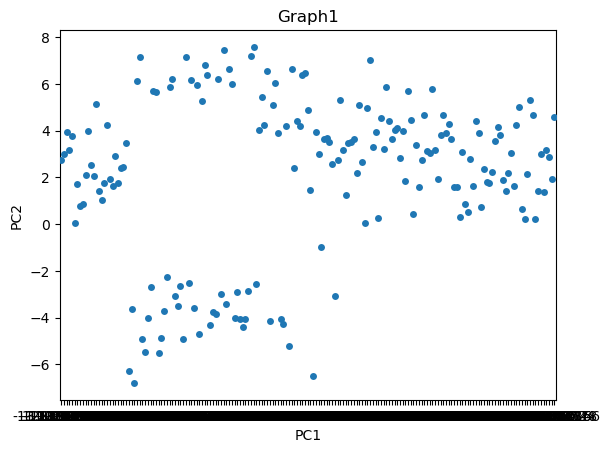

In [75]:
x = data_train['PC1']
y = data_train['PC2']
ax = sns.stripplot(x=x,y=y);
ax.set(xlabel = 'PC1',ylabel='PC2')
plt.title('Graph1')
plt.show()

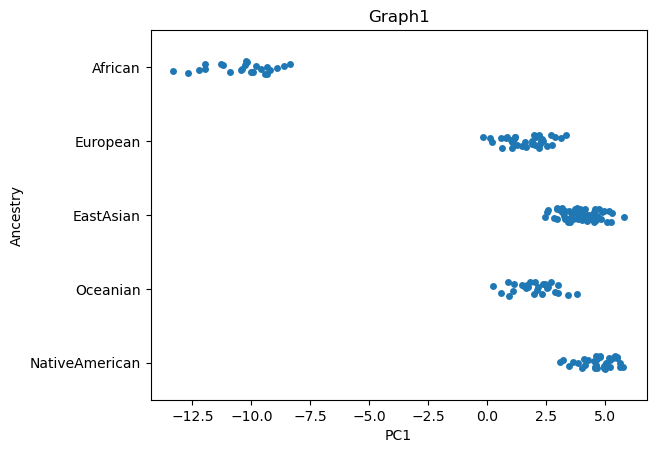

In [76]:
x = data_train['PC1']
y = data_train['Ancestry']
ax = sns.stripplot(x=x,y=y);
ax.set(xlabel = 'PC1',ylabel='Ancestry')
plt.title('Graph1')
plt.show()

### Swarm Plot

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


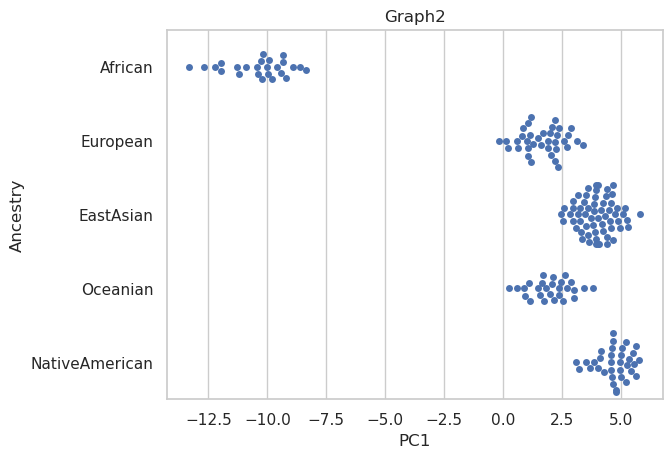

In [78]:
x = data_train['PC1']
y = data_train['Ancestry']
sns.set(style='whitegrid')
ax = sns.swarmplot(x=x, y=y)
ax.set(xlabel = 'PC1',ylabel='Ancestry')
plt.title('Graph2')
plt.show()

### Counterplot

Text(0.5, 1.0, 'Graph3')

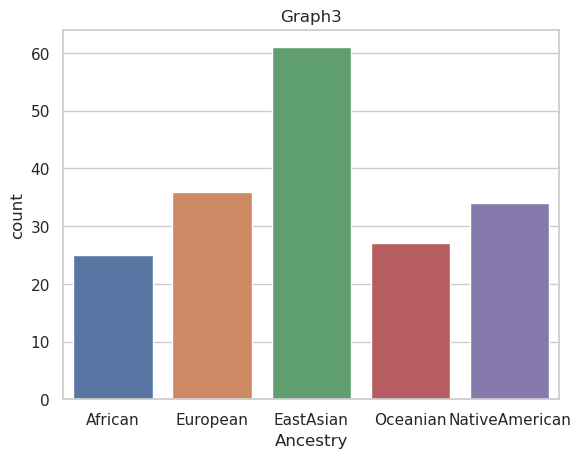

In [80]:
sns.countplot(x =data_train['Ancestry']) 
plt.title('Graph3')

### Box Plot

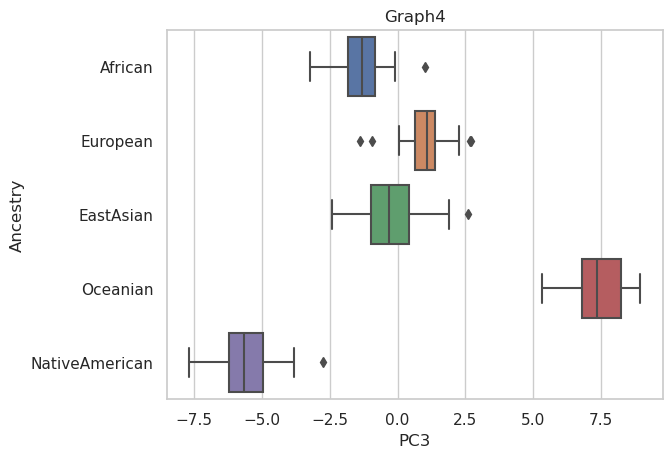

In [81]:
x = data_train['PC3']
y = data_train['Ancestry']
ax = sns.boxplot(x=x, y=y)
ax.set(xlabel = 'PC3',ylabel='Ancestry')
plt.title('Graph4')
plt.show()

## HeatMap

/tmp/ipykernel_32/300453900.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_train.corr()


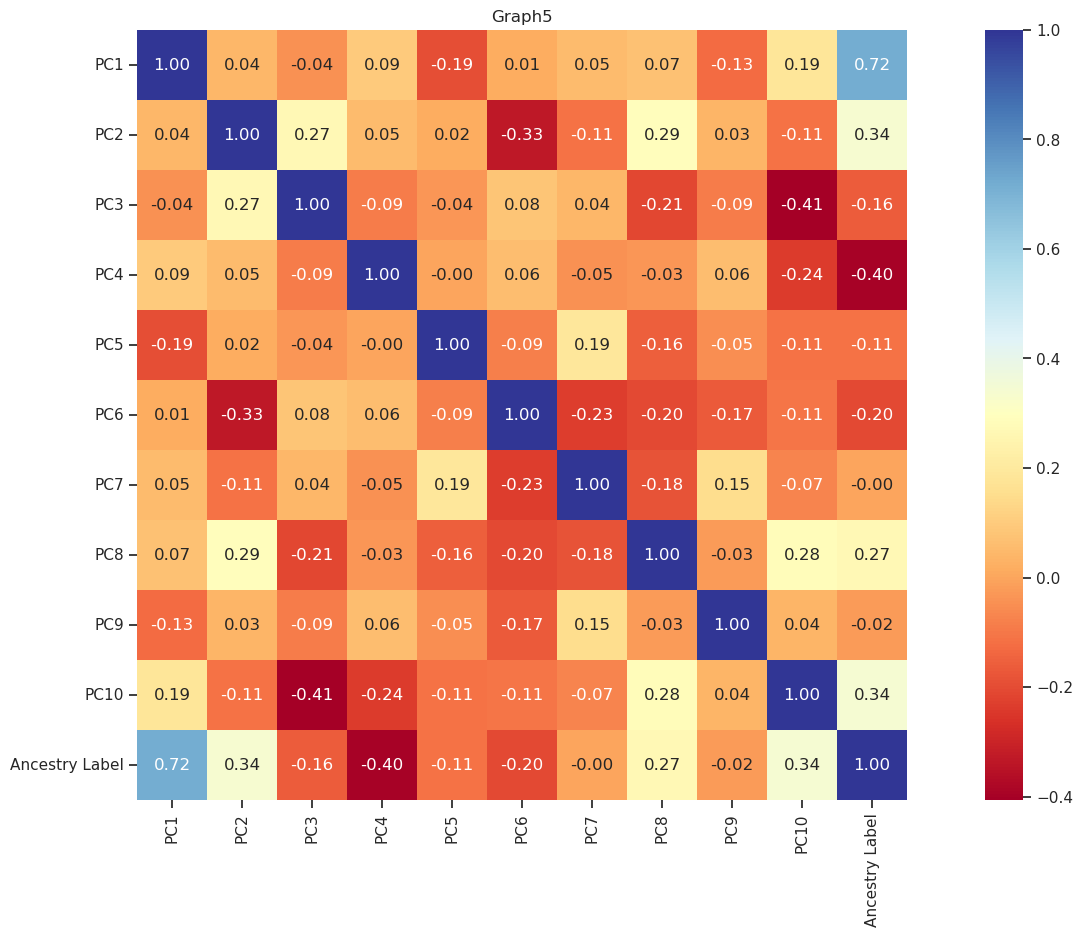

In [99]:
correlation_matrix = data_train.corr()
sns.set(style="ticks")
plt.figure(figsize=(20, 10)) 
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlBu", fmt=".2f", square=True)
plt.title('Graph5')
plt.show()

## Statistics

In [84]:
data_train.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry Label
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,1.404880,2.022935,0.001913,0.102812,0.243929,0.293902,0.043762,-0.185769,0.103880,-0.041720,2.049180
std,4.912770,3.486088,3.919764,3.158607,2.146196,1.775345,1.590285,1.508038,1.585749,0.979746,1.280791
min,-13.319922,-6.790059,-7.682406,-5.578577,-3.738619,-3.750904,-4.658872,-4.637746,-3.805225,-0.671274,0.000000
25%,1.378429,0.693607,-1.670439,-2.218318,-0.689892,-0.778750,-0.814203,-1.150829,-0.961702,-0.671274,1.000000
50%,3.078680,2.891455,-0.216789,-0.158435,0.104254,0.166350,0.087942,-0.179818,0.127011,-0.671274,2.000000
75%,4.306548,4.258144,1.274309,3.276286,0.782704,1.127730,0.975648,0.733770,1.233731,0.885596,3.000000
max,5.811956,7.582173,8.938295,5.892653,13.195087,6.004057,5.140476,3.908339,3.739434,2.442467,4.000000


In [86]:
# MEAN
column_means = data_train.mean(numeric_only = True)
column_means

PC1               1.404880
PC2               2.022935
PC3               0.001913
PC4               0.102812
PC5               0.243929
PC6               0.293902
PC7               0.043762
PC8              -0.185769
PC9               0.103880
PC10             -0.041720
Ancestry Label    2.049180
dtype: float64

In [87]:
# MEDIAN
column_means = data_train.median(numeric_only = True)
column_means

PC1               3.078680
PC2               2.891455
PC3              -0.216789
PC4              -0.158435
PC5               0.104254
PC6               0.166350
PC7               0.087942
PC8              -0.179818
PC9               0.127011
PC10             -0.671274
Ancestry Label    2.000000
dtype: float64

In [89]:
#  STANDARD DEVIATION
column_means = data_train.std(numeric_only = True)
column_means

PC1               4.912770
PC2               3.486088
PC3               3.919764
PC4               3.158607
PC5               2.146196
PC6               1.775345
PC7               1.590285
PC8               1.508038
PC9               1.585749
PC10              0.979746
Ancestry Label    1.280791
dtype: float64

In [103]:
# Z SCORE
numeric_columns = data_train.select_dtypes(include=['float64']).columns
numeric_data = data_train[numeric_columns]
z_scores = numeric_data.apply(zscore)
z_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-2.511783,-0.352128,-0.292965,-0.372630,5.425565,-1.445854,2.832805,1.134195,-1.465890,-0.644331
1,-2.325815,-0.174343,-0.187140,-0.173472,4.753797,0.084503,1.637455,-2.960264,2.053705,-0.644331
2,-2.194233,0.256035,-0.236205,-0.023378,4.872480,-1.325315,3.213698,-0.841357,0.215190,-0.644331
3,-2.577167,-0.083391,-0.599055,-0.018104,6.051027,-1.899363,1.777925,-1.378688,1.435862,-0.644331
4,-2.363597,0.012476,-0.201432,-0.233403,3.372079,-1.094281,0.423407,-2.524737,-0.003287,-0.644331
...,...,...,...,...,...,...,...,...,...,...
178,0.644537,-0.122807,-1.600667,-1.011405,-0.041226,-1.583372,-0.775714,0.550109,1.763843,0.949083
179,0.643797,-0.126938,-1.310539,-1.401642,-0.103828,-0.610608,-1.186566,0.044670,0.693536,0.949083
180,0.346263,-0.157004,-1.473780,-0.694153,-0.464670,0.433596,-0.873565,-0.019806,-0.150053,0.949083
181,0.373563,-0.862281,-1.036446,-0.026002,-0.342589,0.188491,0.027857,0.614055,1.997108,0.949083


## Model building

### Logistic Regression

In [104]:
data_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry,Ancestry Label
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274,African,0
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274,African,0
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274,African,0
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274,African,0
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274,African,0


In [105]:
X = data_train.drop(['Ancestry', 'Ancestry Label'], axis =1)
y = data_train['Ancestry Label']

In [106]:
X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-10.901171,0.798743,-1.143301,-1.070960,11.856396,-2.265965,4.536405,1.519959,-2.214294,-0.671274
1,-9.990054,1.416821,-0.729626,-0.443621,10.418594,0.443514,2.640659,-4.637746,3.351629,-0.671274
2,-9.345388,2.913054,-0.921421,0.029173,10.672615,-2.052552,5.140476,-1.451096,0.444183,-0.671274
3,-11.221507,1.733021,-2.339817,0.045786,13.195087,-3.068897,2.863434,-2.259194,2.374566,-0.671274
4,-10.175158,2.066307,-0.785493,-0.632400,7.461272,-1.643509,0.715258,-3.982752,0.098681,-0.671274
...,...,...,...,...,...,...,...,...,...,...
178,4.562678,1.595991,-6.255160,-3.083079,0.155693,-2.509439,-1.186470,0.641546,2.893239,0.885596
179,4.559052,1.581629,-5.121037,-4.312312,0.021703,-0.787173,-1.838054,-0.118590,1.200644,0.885596
180,3.101335,1.477101,-5.759153,-2.083745,-0.750615,1.061579,-1.341655,-0.215556,-0.133415,0.885596
181,3.235086,-0.974829,-4.049595,0.020907,-0.489322,0.627622,0.087942,0.737715,3.262126,0.885596


In [107]:
y

0      0
1      0
2      0
3      0
4      0
      ..
178    4
179    4
180    4
181    4
182    4
Name: Ancestry Label, Length: 183, dtype: int64

In [109]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.22, stratify = y)

In [111]:
model = LogisticRegression()
model.fit(X_train , y_train)
model.score(X_test, y_test)

1.0

In [112]:
data_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,Unknown
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,Unknown
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,Unknown
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274,Unknown
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274,Unknown


In [114]:
data_test.isnull().sum()

PC1         0
PC2         0
PC3         0
PC4         0
PC5         0
PC6         0
PC7         0
PC8         0
PC9         0
PC10        0
Ancestry    0
dtype: int64

In [116]:
data_test.duplicated().sum()

0

In [117]:
X_Test = data_test.drop(['Ancestry'], axis  =1)

In [118]:
y_pred = model.predict(X_Test)
y_pred = pd.Series(y_pred)
y_pred

0      3
1      4
2      1
3      0
4      2
      ..
106    0
107    0
108    0
109    0
110    0
Length: 111, dtype: int64

In [120]:
Output = pd.concat((X_Test, y_pred), axis =1)
Output.columns.values[10] = 'Ancestry Label'
Output.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Ancestry Label
0,2.517683,5.464283,9.067873,-4.965928,-0.741937,0.039785,0.573279,-0.216918,2.454823,-0.671274,3
1,6.077012,1.032867,-5.795883,-3.490064,-0.600204,-0.120803,1.243767,1.821390,-1.173053,2.442467,4
2,1.016945,-2.913299,0.907702,1.233580,-1.983452,1.605964,2.674998,-0.732921,-2.157438,-0.671274,1
3,-10.860926,2.545077,0.023950,-1.474450,0.372286,-2.609954,-2.794092,1.264747,-3.974644,-0.671274,0
4,4.790262,3.621650,-1.442221,5.459907,-0.864235,-2.591185,-0.062762,0.515344,0.228729,-0.671274,2


### SVM 
#### Using output from above in SVM

In [146]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [147]:
predicted_prob = logreg.predict_proba(X_test)[:, 1]
predicted_label = logreg.predict(X_test)

In [148]:
X_train_new = np.column_stack((X_train, logreg.predict_proba(X_train)[:, 1]))
X_train_new = np.column_stack((X_train, logreg.predict(X_train)))
X_test_new = np.column_stack((X_test, predicted_prob))
X_test_new = np.column_stack((X_test, predicted_label))

In [150]:
svm = SVC()
svm.fit(X_train_augmented, y_train)

SVC()

In [151]:
accuracy = svm.score(X_test_new, y_test)

In [152]:
accuracy

1.0